<p align="center">
    <img src="https://github.com/GeostatsGuy/GeostatsPy/blob/master/TCG_color_logo.png?raw=true" width="220" height="240" />

</p>

# Data Science Basics in Python Series

## Chapter VI: Basic Statistical Analysis in Python 

### Michael Pyrcz, Associate Professor, The University of Texas at Austin 

*Novel Data Analytics, Geostatistics and Machine Learning Subsurface Solutions*

####  Basic Univariate Statistics

Here's a demonstration of the calculation and visualization for basic statistical analysis in Python. 

We will use the following Python packages:

* [statistics](https://docs.python.org/3/library/statistics.html)

* [SciPy](https://www.scipy.org/)

* [MatPlotLib](https://matplotlib.org/)

We will cover a variety of common, basic statistical analyses and displays.

####  Basic Univariate Statistics

This tutorial includes the methods and operations that would commonly be required for Engineers and Geoscientists working with Regularly Gridded Data Structures for the purpose of:

1. Data Checking and Cleaning
2. Data Mining / Inferential Data Analysis
3. Predictive Modeling

for Data Analytics, Geostatistics and Machine Learning.

#### General Definitions

**Statistics**

collecting, organizing, and interpreting data, as well as drawing conclusions and making decisions.

**Geostatistics**

a branch of applied statistics that integrates: 

1. the spatial (geological) context,

2. the spatial relationships, 

3. volumetric support / scale, and 

4.  uncertainty.  

**Data Analytics**

use of statistics [with visualization] to support decision making.

**Big Data Analytics** 

process of examining large and varied data sets (big data) to discover patterns and make decisions.

#### General Definitions

**Variable** or **Feature** 

* any property measured / observed in a study (e.g., porosity, permeability, mineral concentrations, saturations, contaminant concentration)
* the measure often requires significant analysis, interpretation and uncertainty, 'data softness'

#### General Definitions

**Population** 

exhaustive, finite list of property of interest over area of interest. Generally the entire population is not accessible.

* exhaustive set of porosity at each location within a reservoir

**Sample** 

set of values, locations that have been measured

* porosity data from well-logs within a reservoir

#### General Definitions

**Parameters**

summary measure of a population

* population mean, population standard deviation, we rarely have access to this

* model parameters is different and we will cover later.

**Statistics**

summary measure of a sample

* sample mean, sample standard deviation, we use statistics as estimates of the parameters


#### Covered Parameters / Statistics

We cover the following parameters and statistics.

| Central Tendency | Dispersion | Outliers | Distributions Shape |
| :--------------: | :--------: | :------: | :-----------------: |
| Arithmetic Average / Mean | Variance | Tukey Outlier Test| Skew            |
| Median            | Standard Deviation |                 | Excess Kurtosis |
| Mode              | Range |                              | Person's Mode Skewness |
| Geometric Mean    | Percentile |                         | Quartile Skew Coefficient |
| Harmonic Mean     | Interquartile Range |                |                           |
| Power Law Average |                     |                |                           |


I have a lecture on these univariate statistics available on [YouTube](https://www.youtube.com/watch?v=wAcbA2cIqec&list=PLG19vXLQHvSB-D4XKYieEku9GQMQyAzjJ&index=11&t=0s).   

#### Nonparmetric Cumulative Distribution Functions (CDFs)

**nonparametric CDF** 
* plotting nonparametric distributions 

**fitting CDFs**
* fitting a parametric distribution and plotting

#### Getting Started

Here's the steps to get setup to run this demonstration:

1. **Install Anaconda 3** on your machine from https://www.anaconda.com/download/. 
2. **Open Jupyter Notebook**, look for the Jupyter app on your system after installing Anaconda 3.
3. **Load this Workflow** found here [PythonDataBasics_Statistics.ipynb](https://github.com/GeostatsGuy/PythonNumericalDemos/blob/master/PythonDataBasics_PedictiveMachineLearning.ipynb). 
4. **Load the data**, this workflow retreives the data from my GitHub [GeoDataSets Repository](https://github.com/GeostatsGuy/GeoDataSets). If you want to work locally, you will need to first download the data file to your working directory. The data file is found here, [2D_MV_200wells.csv](https://github.com/GeostatsGuy/GeoDataSets/blob/master/2D_MV_200wells.csv). Code is provided below to set the working directory and to load the data locally.

#### Load the required libraries

The following code loads the required libraries.

In [2]:
import numpy as np                              # ndarrys for gridded data
import pandas as pd                             # DataFrames for tabular data
import os                                       # set working directory, run executables
import matplotlib.pyplot as plt                 # plotting
import scipy                                    # statistics
import statistics as stats                      # statistics like the mode
from scipy.stats import norm                    # fitting a Gaussian distribution

#### Set the Working Directory

I always like to do this so I don't lose files and to simplify subsequent read and writes (avoid including the full address each time). Set this to your working directory, with the above mentioned data file.

In [3]:
os.chdir("c:/PGE383")                           # set the working directory

#### Loading Data 

Let's load the provided multivariate, spatial dataset [2D_MV_200wells.csv](https://github.com/GeostatsGuy/GeoDataSets). These are the features:  

| Feature  | Units | Descriptions |
| :------: | :--------------: | :--------- |
| X, Y  | $meters$     | Location |
| porosity | $fraction$   | rock void fraction |
| permeability | $mDarcy$ | capability of a porous rock to permit the flow of fluids through its pore spaces |
| acoustic impedance | $\frac{kg}{m^2s} 10^6$ | rock bulk density times rock acoustic velocity |

* load use the Pandas 'read_csv' function and rename the features for readable code

In [4]:
df = pd.read_csv("2D_MV_200wells.csv")          # read a .csv file in as a DataFrame
df = df.rename(columns={'facies_threshold_0.3': 'facies','permeability':'perm','acoustic_impedance':'ai'}) # rename columns of the 
df.head()

,X,Y,facies,porosity,perm,ai
0,565,1485,1,0.1184,6.170,2.009
1,2585,1185,1,0.1566,6.275,2.864
2,2065,2865,2,0.1920,92.297,3.524
3,3575,2655,1,0.1621,9.048,2.157
4,1835,35,1,0.1766,7.123,3.979


#### Extract a Feature 

Let's extract one of the features, porosity, into a 1D ndarray and do our statistics on porosity.

* then we can use NumPy's statistics methods

* note this is a **shallow copy**, any changes to the array will change the feature in the DataFrame

In [28]:
feature = 'Porosity'; fcol = 'porosity'; funits = '(fraction)'; f2units = '(fraction^2)'; fmin = 0.0; fmax = 0.25
X = df[fcol].values
print('We are working with ' + feature + ' ' + funits + ' from column ' + fcol +  ' .')

We are working with Porosity (fraction) from column porosity .


#### Visualize the Feature Histogram

To improve our understanding of the feature, let's visualize the featre distribuiton as a histogram.

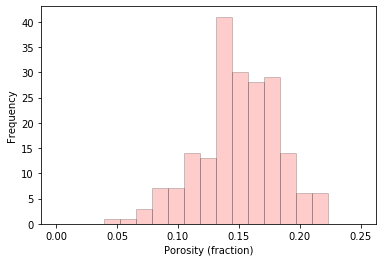

In [38]:
plt.hist(X,color='red',alpha=0.2,edgecolor='black',bins=np.linspace(fmin,fmax,20))
plt.xlabel(feature + ' ' + funits); plt.ylabel('Frequency');

#### Measures of Central Tendency

##### The Arithmetic Average / Mean

\begin{equation}
\overline{x} = \frac{1}{n}\sum^n_{i=1} x_i
\end{equation}

In [39]:
average = np.average(X)
print(feature + ' average is ' + str(round(average,2)) + ' ' + funits + '.')

Porosity average is 0.15 (fraction).


#### Measures of Central Tendency

##### The Weighted Arithmetic Average / Mean

Many of the following methods accept data weights, e.g. declustering

\begin{equation}
\overline{x} = \frac{\sum^n_{i=1} \lambda_i x_i}{\sum^n_{i=1} \lambda_i}
\end{equation}

In [40]:
weights = np.ones(X.shape)
wt_average = np.average(X,weights = weights)
print(feature + ' average is ' + str(round(wt_average,2)) + ' ' + funits + '.')

Porosity average is 0.15 (fraction).


#### Measures of Central Tendency

##### Median

\begin{equation}
P50_x = F^{-1}_{x}(0.50)
\end{equation}

In [41]:
median = np.median(X)
print(feature + ' median is ' + str(round(median,2)) + ' ' + funits + '.')

Porosity median is 0.15 (fraction).


#### Measures of Central Tendency

##### Mode

The most common value. To do this we should bin the data, like into histogram bins/bars.  To do this we will round the data to the 2nd decimal place.  We are assume bin boundaries, $0.01, 0.02,\ldots, 0.30$.

In [42]:
mode = stats.mode(np.round(X,2))
print(feature + ' mode is ' + str(round(mode,2)) + ' ' + funits + '.')

Porosity mode is 0.14 (fraction).


#### Measures of Central Tendency

##### Geometric Mean

\begin{equation}
\overline{x}_G = ( \prod^n_{i=1} x_i )^{\frac{1}{n}}
\end{equation}

In [43]:
geometric = scipy.stats.mstats.gmean(X)
print(feature + ' geometric mean is ' + str(round(geometric,2)) + ' ' + funits + '.')

Porosity geometric mean is 0.15 (fraction).


#### Measures of Central Tendency

##### Harmonic Mean

\begin{equation}
\overline{x}_H = \frac{n}{\sum^n_{i=1} \frac{1}{x_i}}
\end{equation}

In [44]:
hmean = scipy.stats.mstats.hmean(X)
print(feature + ' harmonic mean is ' + str(round(hmean,2)) + ' ' + funits + '.')

Porosity harmonic mean is 0.14 (fraction).


##### Power Law Average

\begin{equation}
\overline{x}_p = (\frac{1}{n}\sum^n_{i=1}{x_i^{p}})^\frac{1}{p}
\end{equation}


In [61]:
power = -0.5
power_avg = np.average(np.power(X,power))**(1/power)
print(feature + ' power law average for p = ' + str(power) + ' is ' + str(round(power_avg,2)) + ' ' + funits + '.')

Porosity power law average for p = -0.5 is 0.14 (fraction).


#### Let's Visualize Some of the Measures of Central Tendency

To visualize ocmpare these statistics, parameters

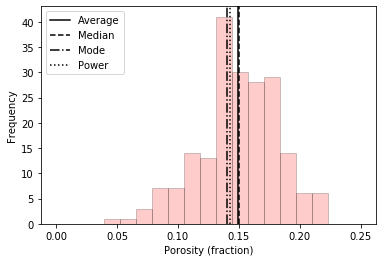

In [64]:
plt.hist(X,color='red',alpha=0.2,edgecolor='black',bins=np.linspace(fmin,fmax,20))
plt.xlabel(feature + ' ' + funits); plt.ylabel('Frequency')
plt.axvline(x=average, ymin=0, ymax=1,color='black',label='Average')
plt.axvline(x=median, ymin=0, ymax=1,color='black',label='Median',linestyle='--')
plt.axvline(x=mode, ymin=0, ymax=1,color='black',label='Mode',linestyle='dashdot')
plt.axvline(x=power_avg, ymin=0, ymax=1,color='black',label='Power',linestyle='dotted');
plt.legend(loc='upper left');

#### Measures of Dispersion

##### Population Variance

\begin{equation}
\sigma^2_{x} = \frac{1}{n}\sum^n_{i=1}(x_i - \mu)
\end{equation}

In [65]:
varp = stats.pvariance(X)
print(feature + ' population variance is ' + str(round(varp,4)) + ' ' + f2units + '.')

Porosity population variance is 0.0011 (fraction^2).


##### Sample Variance

\begin{equation}
\sigma^2_{x} = \frac{1}{n-1}\sum^n_{i=1}(x_i - \overline{x})^2
\end{equation}

In [66]:
var = stats.variance(X)
print(feature + ' sample variance is ' + str(round(var,4)) + ' ' + f2units + '.')

Porosity sample variance is 0.0011 (fraction^2).


##### Population Standard Deviation

\begin{equation}
\sigma_{x} = \sqrt{ \frac{1}{n}\sum^n_{i=1}(x_i - \mu)^2 }
\end{equation}

In [67]:
stdp = stats.pstdev(X)
print(feature + ' sample variance is ' + str(round(stdp,4)) + ' ' + f2units + '.')

Porosity sample variance is 0.0329 (fraction^2).


##### Sample Standard Deviation

\begin{equation}
\sigma_{x} = \sqrt{ \frac{1}{n-1}\sum^n_{i=1}(x_i - \mu)^2 }
\end{equation}

In [68]:
std = stats.stdev(X)
print(feature + ' sample variance is ' + str(round(std,4)) + ' ' + f2units + '.')

Porosity sample variance is 0.0329 (fraction^2).


##### Range

\begin{equation}
range_x = P100_x - P00_x
\end{equation}

In [69]:
range = np.max(X) - np.min(X)
print(feature + ' range is ' + str(round(range,2)) + ' ' + funits + '.')

Porosity range is 0.17 (fraction).


##### Percentile

\begin{equation}
P(p)_x = F^{-1}_{x}(p)
\end{equation}

In [80]:
p_value = 13
percentile = np.percentile(X,p_value)
print(feature + ' ' + str(int(p_value)) + 'th percentile is ' + str(round(percentile,2)) + ' ' + funits + '.')

Porosity 13th percentile is 0.11 (fraction).


##### Inter Quartile Range

\begin{equation}
IQR = P(0.75)_x - P(0.25)_x
\end{equation}

In [77]:
iqr = scipy.stats.iqr(X)
print(feature + ' interquartile range is ' + str(round(iqr,2)) + ' ' + funits + '.')

Porosity interquartile range is 0.04 (fraction).


#### Tukey Test for Outliers

Let's demonstrate the Tukey test for outliers based on the lower and upper fences.

\begin{equation}
fence_{lower} = P_x(0.25) - 1.5 \times [P_x(0.75) - P_x(0.25)]
\end{equation}

\begin{equation}
fence_{upper} = P_x(0.75) + 1.5 \times [P_x(0.75) - P_x(0.25)]
\end{equation}

Then we declare samples values above the upper fence or below the lower fence as outliers.

In [81]:
p25, p75 = np.percentile(X, [25, 75])
lower_fence = p25 - iqr * 1.5
upper_fence = p75 + iqr * 1.5
outliers = X[np.where((X > upper_fence) | (X < lower_fence))[0]]
print(feature + ' outliers by Tukey test include ' + str(outliers) + '.')
outliers_indices = np.where((X > upper_fence) | (X < lower_fence))[0]
print(feature + ' outlier indices by Tukey test are ' + str(outliers_indices) + '.')

Porosity outliers by Tukey test include [0.06726 0.05    0.06092].
Porosity outlier indices by Tukey test are [110 152 198].


#### Let's Visualize Outliers with a Box Plot (Box and Wisker Plot)

The median is the orange line, P25 and P75 are the box and lower and upper fences are the wiskers.

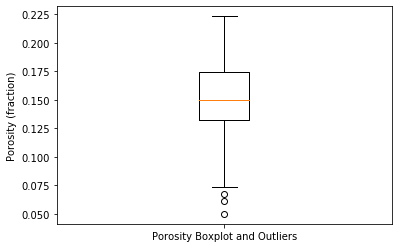

In [89]:
plt.boxplot(X); plt.ylabel(feature + ' ' + funits)
plt.xticks([1], [feature + ' Boxplot and Outliers']); plt.show()

#### Measures of Shape

##### Pearson's Mode Skewness

\begin{equation}
skew = \frac{3 (\overline{x} - P50_x)}{\sigma_x}
\end{equation}

In [91]:
skew = (average - median)/std
print(feature + ' skew is ' + str(round(skew,2)) + '.')

Porosity skew is -0.03.


##### Population Skew, 3rd Central Moment

\begin{equation}
\gamma_{x} = \frac{1}{n}\sum^n_{i=1}(x_i - \mu)^3
\end{equation}

In [92]:
cm = scipy.stats.moment(X,moment=3)
print(feature + ' 3rd cenral moment is ' + str(round(cm,7)) + '.')

Porosity 3rd cenral moment is -1.22e-05.


##### Quartile Skew Coefficient

\begin{equation}
QS = \frac{(P75_x - P50_x) - (P50_x - P25_x)}{(P75_x - P25_x)}
\end{equation}

In [93]:
qs = ((np.percentile(X,75)-np.percentile(X,50))
          -(np.percentile(X,50)-np.percentile(X,25))) /((np.percentile(X,75))-np.percentile(X,25))
print(feature + ' quartile skew coefficient is ' + str(round(qs,2)) + '.')

Porosity quartile skew coefficient is 0.14.


#### Plot the Nonparametric CDF

Let's demonstrate plotting a nonparametric cumulative distribution function (CDF) in Python

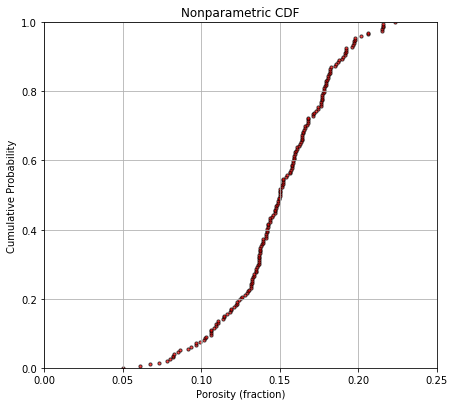

In [95]:
# sort the data:
sort = np.sort(X)

# calculate the cumulative probabilities assuming known tails
p = np.arange(len(X)) / (len(X) - 1)

# plot the cumulative probabilities vs. the sorted porosity values
plt.subplot(122)
plt.scatter(sort, p, c = 'red', edgecolors = 'black', s = 10, alpha = 0.7)
plt.xlabel(feature + ' ' + funits); plt.ylabel('Cumulative Probability'); plt.grid(); 
plt.title('Nonparametric CDF')
plt.ylim([0,1]); plt.xlim([0,0.25])
plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.2, wspace=0.2, hspace=0.3)

#### Fit a Gaussian Distribution

Let's fit a Gaussian distribution

* we get fancy with Maximuum Likelihood Estimation (MLE) for the Gaussian parametric distribution fit mean and standard deviation

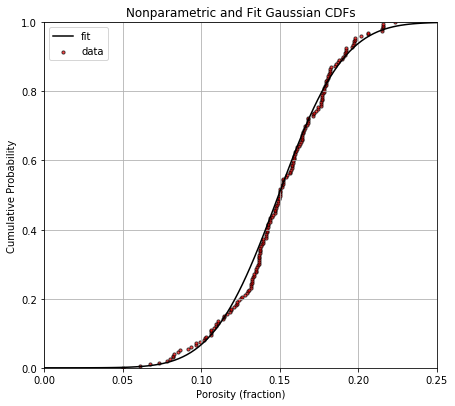

In [97]:
values = np.linspace(fmin,fmax,100) 
fit_mean, fit_stdev = norm.fit(X,loc = average, scale = std) # fit MLE of the distribution 
cumul_p = norm.cdf(values, loc = fit_mean, scale = fit_stdev)

# plot the cumulative probabilities vs. the sorted porosity values
plt.subplot(122)
plt.scatter(sort, p, c = 'red', edgecolors = 'black', s = 10, alpha = 0.7,label='data')
plt.plot(values,cumul_p, c = 'black',label='fit'); plt.legend(loc='upper left')
plt.xlabel(feature + ' ' + funits); plt.ylabel('Cumulative Probability'); plt.grid(); 
plt.title('Nonparametric and Fit Gaussian CDFs')
plt.ylim([0,1]); plt.xlim([0,0.25])
plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.2, wspace=0.2, hspace=0.3)

#### Comments

This was a basic demonstration of univariate statistics in Python.

I have other demonstrations on the basics of working with DataFrames, ndarrays, univariate statistics, plotting data, declustering, data transformations, trend modeling and many other workflows available at [Python Demos](https://github.com/GeostatsGuy/PythonNumericalDemos) and a Python package for data analytics and geostatistics at [GeostatsPy](https://github.com/GeostatsGuy/GeostatsPy). 
  
I hope this was helpful,

*Michael*

#### The Author:

### Michael Pyrcz, Associate Professor, University of Texas at Austin 
*Novel Data Analytics, Geostatistics and Machine Learning Subsurface Solutions*

With over 17 years of experience in subsurface consulting, research and development, Michael has returned to academia driven by his passion for teaching and enthusiasm for enhancing engineers' and geoscientists' impact in subsurface resource development. 

For more about Michael check out these links:

#### [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)

#### Want to Work Together?

I hope this content is helpful to those that want to learn more about subsurface modeling, data analytics and machine learning. Students and working professionals are welcome to participate.

* Want to invite me to visit your company for training, mentoring, project review, workflow design and / or consulting? I'd be happy to drop by and work with you! 

* Interested in partnering, supporting my graduate student research or my Subsurface Data Analytics and Machine Learning consortium (co-PIs including Profs. Foster, Torres-Verdin and van Oort)? My research combines data analytics, stochastic modeling and machine learning theory with practice to develop novel methods and workflows to add value. We are solving challenging subsurface problems!

* I can be reached at mpyrcz@austin.utexas.edu.

I'm always happy to discuss,

*Michael*

Michael Pyrcz, Ph.D., P.Eng. Associate Professor The Hildebrand Department of Petroleum and Geosystems Engineering, Bureau of Economic Geology, The Jackson School of Geosciences, The University of Texas at Austin

#### More Resources Available at: [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)
